In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.color import rgb2gray
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans

from tensorflow import keras

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.utils import to_categorical


from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

%matplotlib inline
# matplotlib.style.use('ggplot')

In [2]:
! cd ..


In [3]:
!ls

 3_29_2021_dry_run.ipynb   checkpoint		'ResNet50 .ipynb'
 3_30_2021_dry_run.ipynb   Land_solution.ipynb	 train.csv
 AlexNet.ipynb		   logs			 VGG16.ipynb


In [4]:
df_index=pd.read_csv('train.csv')
df_index

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


In [5]:
df_index.shape

(200840, 5)

<AxesSubplot:>

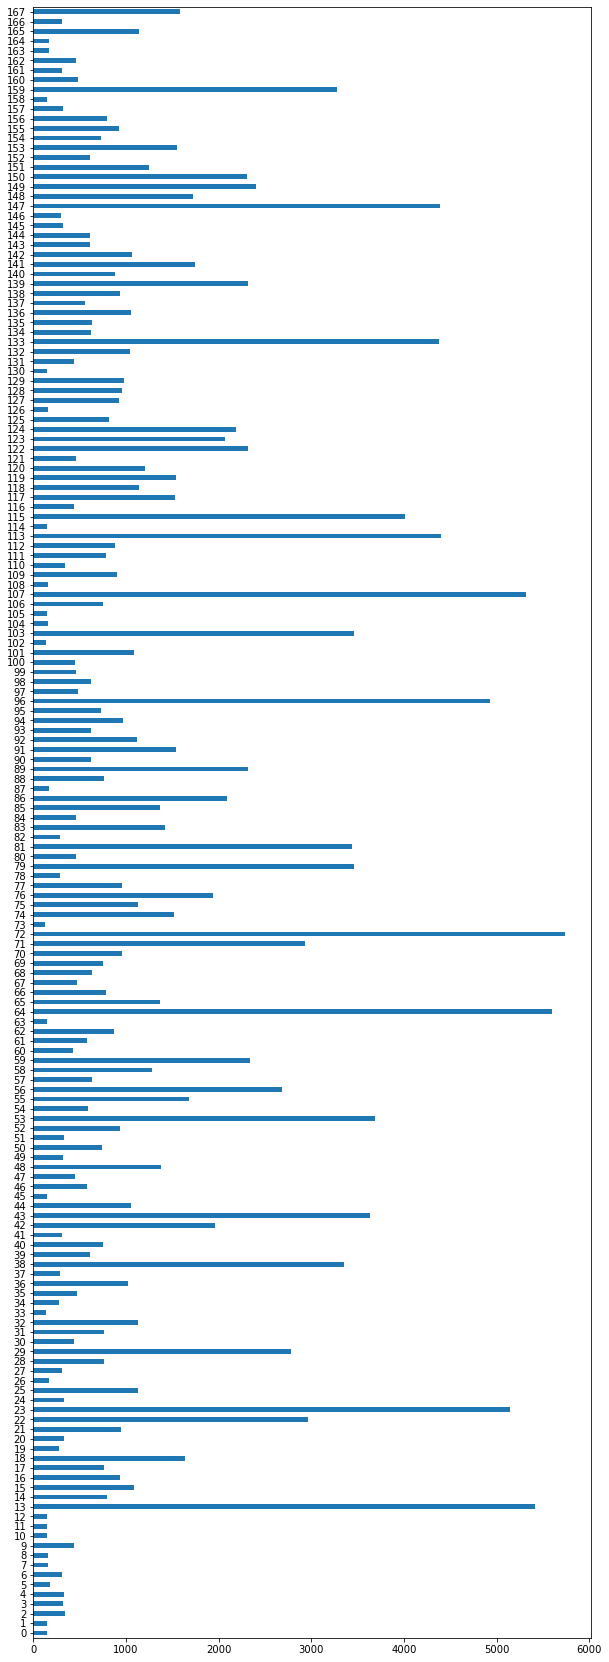

In [6]:
plt.figure(figsize=(10,30))
df_index['grapheme_root'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

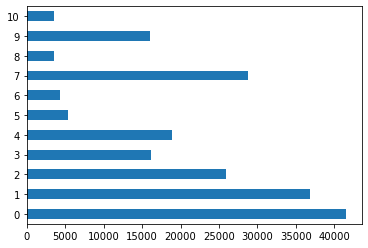

In [7]:
df_index['vowel_diacritic'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

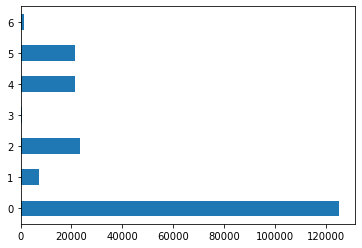

In [8]:
df_index['consonant_diacritic'].value_counts().sort_index().plot.barh()  

In [9]:
df_index['image_id']=df_index['image_id']+'.jpg'

In [10]:
df_index

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0.jpg,15,9,5,ক্ট্রো
1,Train_1.jpg,159,0,0,হ
2,Train_2.jpg,22,3,5,খ্রী
3,Train_3.jpg,53,2,2,র্টি
4,Train_4.jpg,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835.jpg,22,7,2,র্খে
200836,Train_200836.jpg,65,9,0,ত্তো
200837,Train_200837.jpg,2,1,4,অ্যা
200838,Train_200838.jpg,152,9,0,স্নো


In [11]:
df_index['consonant_diacritic'].value_counts() 
#7 values , # 7 columns one hot coding, output = 7 colums and softmax

0    125278
2     23465
5     21397
4     21270
1      7424
6      1387
3       619
Name: consonant_diacritic, dtype: int64

In [12]:
df_index.dtypes

image_id               object
grapheme_root           int64
vowel_diacritic         int64
consonant_diacritic     int64
grapheme               object
dtype: object

In [13]:
!pwd

/home/beth/Galvanize/capstone/capstone_2/src


In [14]:
df_index_1 = df_index.iloc[:44597,:]

In [15]:
df_index_1

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0.jpg,15,9,5,ক্ট্রো
1,Train_1.jpg,159,0,0,হ
2,Train_2.jpg,22,3,5,খ্রী
3,Train_3.jpg,53,2,2,র্টি
4,Train_4.jpg,71,9,5,থ্রো
...,...,...,...,...,...
44592,Train_44592.jpg,78,1,0,দ্মা
44593,Train_44593.jpg,86,2,0,ন্তি
44594,Train_44594.jpg,140,0,0,ষ্ক
44595,Train_44595.jpg,18,9,0,ক্ষো


<AxesSubplot:>

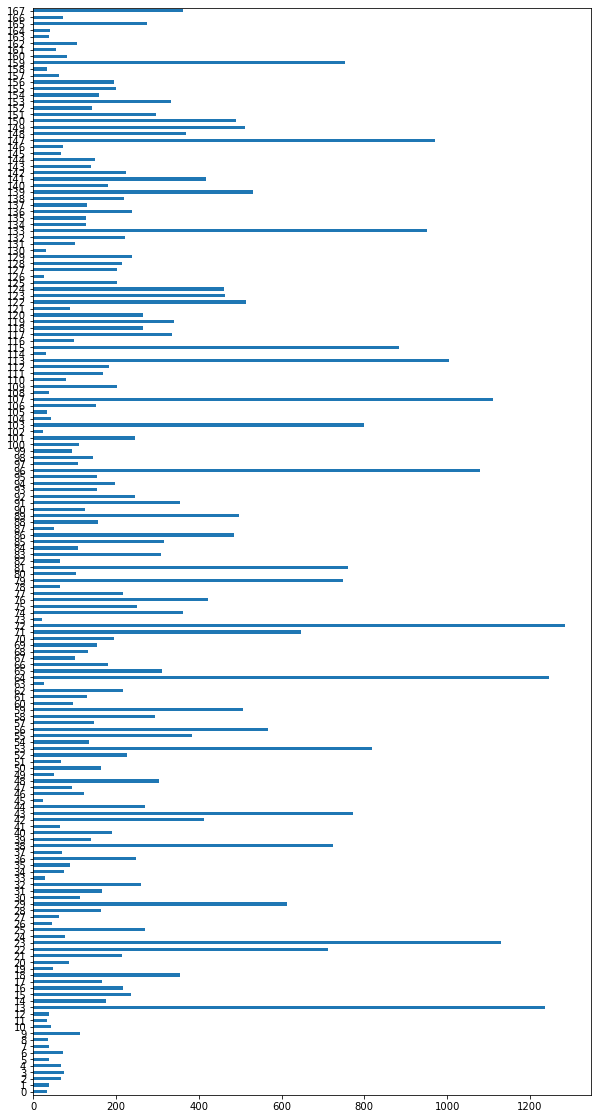

In [16]:
plt.figure(figsize=(10,20))
df_index_1['grapheme_root'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

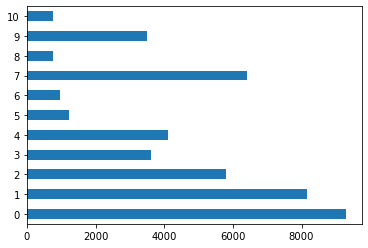

In [17]:
df_index_1['vowel_diacritic'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

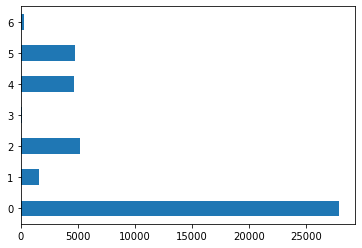

In [18]:
df_index_1['consonant_diacritic'].value_counts().sort_index().plot.barh()  

In [19]:
print(len(df_index_1['grapheme_root'].value_counts()))
df_index_1['grapheme_root'].value_counts()

168


72     1284
64     1247
13     1236
23     1129
107    1110
       ... 
63       27
126      26
45       24
102      24
73       22
Name: grapheme_root, Length: 168, dtype: int64

In [20]:
print(len(df_index_1['vowel_diacritic'].value_counts()))
df_index_1['vowel_diacritic'].value_counts()

11


0     9290
1     8159
7     6414
2     5813
4     4109
3     3613
9     3494
5     1220
6      951
8      769
10     765
Name: vowel_diacritic, dtype: int64

In [21]:
print(len(df_index_1['consonant_diacritic'].value_counts()))
df_index_1['consonant_diacritic'].value_counts() 

7


0    27933
2     5168
5     4784
4     4639
1     1641
6      293
3      139
Name: consonant_diacritic, dtype: int64

In [22]:
df_shuffle = df_index_1.sample(frac=1) #shuffle

In [23]:
train = df_shuffle.iloc[:int(0.8*len(df_index_1)),:]
test = df_shuffle.iloc[int(0.8*len(df_index_1)):,:]

In [24]:
train

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
5716,Train_5716.jpg,38,1,0,চা
26283,Train_26283.jpg,76,4,0,দ্বু
38976,Train_38976.jpg,42,0,2,র্ছ
15591,Train_15591.jpg,16,6,0,ক্তৃ
32997,Train_32997.jpg,96,2,5,প্রি
...,...,...,...,...,...
31451,Train_31451.jpg,148,0,0,স্ক
20793,Train_20793.jpg,79,10,0,ধৌ
23500,Train_23500.jpg,118,9,0,ম্বো
12054,Train_12054.jpg,81,0,2,র্ন


In [25]:
from PIL import Image 

def mygenerator(dataframe, N): # X = image, y = target
    for _ in range(N):
        sample = dataframe.sample()
        TRAIN_DIR = '/home/beth/Galvanize/capstone/capstone_2/data/train/train/'
        image_name = TRAIN_DIR + sample['image_id'].values[0]
        image=Image.open(image_name)
        y=np.zeros(7)
        y[sample["consonant_diacritic"].values[0]]=1   
        X = np.array(image).astype(np.int32)
        y = y.astype(np.int32).reshape(1,7) 
        X = np.array([X,X,X]).reshape(1,137,236,3)
        yield X,y
# infinite numbers of X and y    

In [26]:
# X,y = next(mygenerator(train, 1000)) # randomly pick a row 

In [33]:
# X.shape

In [34]:
# y.shape

In [35]:
# next(train_generator)[1]  # set of images # 32 y values  # one hot 

In [36]:
# next(train_generator)[0].shape # images 

In [37]:
# len(train_generator)

In [38]:
# len(validation_generator)

In [39]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="valid", input_shape=[137,236,3]),#input shape: [rows, columns, channels]
    keras.layers.MaxPooling2D(2),
    
#     keras.layers.Conv2D(128, 3, activation="relu", padding="valid"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="valid"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(128, 3, activation="relu", padding="valid"),
#     keras.layers.Conv2D(256, 3, activation="relu", padding="valid"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation="softmax")
])

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Details/Retrospectives:
# - reduce the layers 
# - first use of ReLU
# - did not Norm layers (not common anymore)
# - no data augmentation
# - dropout 0.5
# - no batch size 32
# - no SGD Momentum 
# - no Learning rate, reduced by 10 manually when val accuracy plateaus
# - no L2 weight decay 5
# - no 7 CNN ensemble: 

In [40]:
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='./checkpoint/model.{epoch:02d}-{val_loss:.2f}.h5'),
    keras.callbacks.TensorBoard(log_dir='./logs')]
history = model.fit(mygenerator(train,8000),
                    epochs=2,                    
                    steps_per_epoch=4000,
                    validation_data=mygenerator(test,2000),callbacks=my_callbacks)# 



Epoch 1/2
4000/4000 [==============================] - 702s 175ms/step - loss: 9.3755 - accuracy: 0.6049 - val_loss: 1.1934 - val_accuracy: 0.6230
Epoch 2/2
4000/4000 [==============================] - 567s 142ms/step - loss: 4.5725 - accuracy: 0.6167


KeyError: 'Failed to format this callback filepath: "./checkpoint/model.{epoch:02d}-{val_loss:.2f}.h5". Reason: \'val_loss\''

In [ ]:
score = model.evaluate(mygenerator(test,2000), verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])  # this is the one we care about

In [225]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 131, 230, 64)      9472      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 65, 115, 64)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 63, 113, 128)      73856     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 31, 56, 128)       0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 29, 54, 128)       147584    
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 14, 27, 128)       0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 48384)           

In [ ]:
[plt.plot(history.history[i], label=i) for i in history.history.keys()]

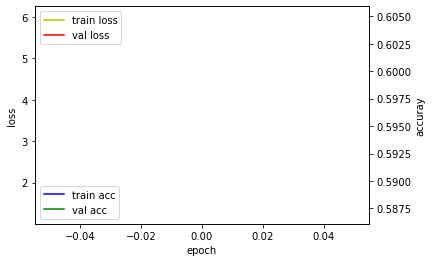

In [226]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [143]:
# TRAIN_DIR = '/home/beth/Galvanize/capstone/capstone_2/data/train/train'
# # VALIDATION_DIR = '/home/beth/Galvanize/capstone/capstone_2/data/test'

# datagen = ImageDataGenerator(validation_split=0.3, rescale=1./255)
# batch_size = 32
# train_generator = datagen.flow_from_dataframe(dataframe=df_index_1,
#                                               directory=TRAIN_DIR,
#                                               x_col="image_id",
#                                               y_col="consonant_diacritic",
#                                               weight_col=None,
#                                               target_size=(137, 236),
#                                               color_mode="grayscale",
#                                               classes=None,
#                                               class_mode="raw",
#                                               batch_size=batch_size,
#                                               shuffle=True,
#                                               subset=None,
#                                               interpolation="nearest",
#                                               validate_filenames=True)

#"raw": numpy array of values in y_col column(s), - "sparse": 1D numpy array of integer labels, 
# validation_generator = ImageDataGenerator.flow_from_dataframe(dataframe,
#                                                          directory=TRAIN_DIR,
#                                                          x_col="filename",
#                                                          y_col="class",
#                                                          weight_col=None,
#                                                          target_size=(256, 256),
#                                                          color_mode="rgb",
#                                                          classes=None,
#                                                          class_mode="categorical",
#                                                          batch_size=batch_size,
#                                                          shuffle=False,
#                                                          seed=None,
#                                                          save_to_dir=None,
#                                                          save_prefix="",
#                                                          save_format="png",
#                                                          subset=None,
#                                                          interpolation="nearest",
#                                                          validate_filenames=True)

# train_generator = datagen.flow_from_directory(
#     TRAIN_DIR, 
#     subset='training'
# )

# val_generator = datagen.flow_from_directory(
#     TRAIN_DIR,
#     subset='validation'
# )
# https://ibrahimgoke.medium.com/split-train-data-into-training-and-validation-when-using-imagedatagenerator-in-keras-ffdc88bbf6f3

# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)


Found 44597 validated image filenames.


In [ ]:
# validation_generator = test_datagen.flow_from_directory(
#         '../data/validation',
#         target_size=(150, 150),
#         batch_size=batch_size,
#         class_mode='binary')

# cat_dog_model.fit_generator(
#     train_generator,
#     steps_per_epoch=180 // batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=20 // batch_size)

# score = cat_dog_model.evaluate(validation_generator, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])  # this is the one we care about

In [ ]:
# # important inputs to the model: don't changes the ones marked KEEP in the functions above
# batch_size = 5000  # number of training samples used at a time to update the weights
# nb_epoch = 2       # number of passes through the entire train dataset before weights "final"
# nb_filters = 12    # number of convolutional filters to use
# pool_size = (2, 2)  # pooling decreases image size, reduces computation, adds translational invariance
# kernel_size = (4, 4)  # convolutional kernel size, slides over image to learn features
# dropout = 0.1
# activation='tanh'
# optimizer='adadelta'

# model = Sequential()  # model is a linear stack of layers (don't change)

#     # note: the convolutional layers and dense layers require an activation function
#     # see https://keras.io/activations/
#     # and https://en.wikipedia.org/wiki/Activation_function
#     # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

#     model.add(Conv2D(nb_filters,
#                      (kernel_size[0], kernel_size[1]),
#                      padding='valid',
#                      input_shape=input_shape))  # first conv. layer  KEEP
#     model.add(Activation(activation))  # Activation specification necessary for Conv2D and Dense layers

#     model.add(Conv2D(nb_filters,
#                      (kernel_size[0], kernel_size[1]),
#                      padding='valid'))  # 2nd conv. layer KEEP
#     model.add(Activation(activation))

#     model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
#     model.add(Dropout(dropout))  # zeros out some fraction of inputs, helps prevent overfitting

#     model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
#     print('Model flattened out to ', model.output_shape)

#     # now start a typical neural network
#     model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
#     model.add(Activation(activation))

#     model.add(Dropout(dropout))  # zeros out some fraction of inputs, helps prevent overfitting

#     model.add(Dense(nb_classes))  # 10 final nodes (one for each class)  KEEP
#     model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

#     # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
#     # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
#     # and KEEP metrics at 'accuracy'
#     # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
#     model.compile(loss='categorical_crossentropy',
#                   optimizer=optimizer,
#                   metrics=['accuracy'],
#                  learning)
#     return model